In [1]:
import pandas as pd
import numpy as np

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
submission=pd.read_csv("gender_submission.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
train.duplicated().sum()

0

In [6]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

sns.set_style("darkgrid")

<AxesSubplot: xlabel='Age', ylabel='Density'>

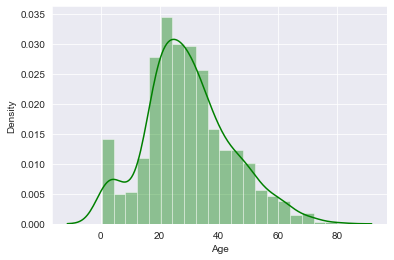

In [8]:
sns.distplot(train['Age'],color='g')

In [9]:
train['Age']=train['Age'].fillna(train.Age.mean())
train['Embarked']=train['Embarked'].fillna(train['Embarked'].mode()[0])
train.drop(['Cabin'],axis=1,inplace=True)

In [10]:
train['TC']=train['Ticket'].apply(lambda x:x.split(" ")[0] if " " in x else "NA")
train['TC1']=train['Ticket'].apply(lambda x:x.split(" ")[1] if " " in x else x)

In [11]:
train['TC'].unique()

array(['A/5', 'PC', 'STON/O2.', 'NA', 'PP', 'A/5.', 'C.A.', 'A./5.',
       'SC/Paris', 'S.C./A.4.', 'A/4.', 'CA', 'S.P.', 'S.O.C.', 'SO/C',
       'W./C.', 'SOTON/OQ', 'W.E.P.', 'STON/O', 'A4.', 'C', 'SOTON/O.Q.',
       'SC/PARIS', 'S.O.P.', 'A.5.', 'Fa', 'CA.', 'F.C.C.', 'W/C',
       'SW/PP', 'SCO/W', 'P/PP', 'SC', 'SC/AH', 'A/S', 'A/4', 'WE/P',
       'S.W./PP', 'S.O./P.P.', 'F.C.', 'SOTON/O2', 'S.C./PARIS',
       'C.A./SOTON'], dtype=object)

In [12]:
train['TC'].replace({'SC/PARIS':'SC/Paris','S.C./PARIS':'SC/Paris'},inplace=True)
train['TC'].replace({'A/5.':'A5','A./5.':'A5','A.5.':'A5','A/5':'A5'},inplace=True)
train['TC'].replace({'S.O.C.':'SOC','SO/C':'SOC'},inplace=True)
train['TC'].replace({'C.A.':'CA','CA.':'CA'},inplace=True)
train['TC'].replace({'SW/PP':'SWPP','S.W./PP':'SWPP'},inplace=True)
train['TC'].replace({'W./C.':'WC','W/C':'WC'},inplace=True)
train['TC'].replace({'A/4.':'A4','A4.':'A4','A/4':'A4'},inplace=True)
train['TC']=np.where(train.TC.str.contains('TON',case=False),'SOTON',train.TC)

In [30]:
train['TC'].nunique()

26

In [13]:
train.Ticket.duplicated().sum()

210

In [14]:
for col in train.select_dtypes(include='object'):
    print("cardinality of column {} is {}\n".format(col,train[col].nunique()))

cardinality of column Name is 891

cardinality of column Sex is 2

cardinality of column Ticket is 681

cardinality of column Embarked is 3

cardinality of column TC is 26

cardinality of column TC1 is 668



In [15]:
train.drop(['Name','Ticket','PassengerId'],axis=1,inplace=True)

<AxesSubplot: >

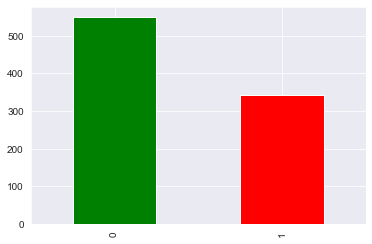

In [16]:
train['Survived'].value_counts().plot(kind='bar',color=['g','r'])

<AxesSubplot: xlabel='Sex', ylabel='count'>

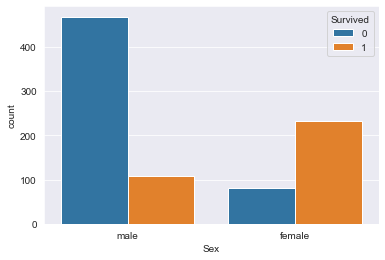

In [17]:
sns.countplot(x='Sex',data=train,hue='Survived')

In [18]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,TC,TC1
0,0,3,male,22.000000,1,0,7.2500,S,A5,21171
1,1,1,female,38.000000,1,0,71.2833,C,PC,17599
2,1,3,female,26.000000,0,0,7.9250,S,SOTON,3101282
3,1,1,female,35.000000,1,0,53.1000,S,NA,113803
4,0,3,male,35.000000,0,0,8.0500,S,NA,373450
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,NA,211536
887,1,1,female,19.000000,0,0,30.0000,S,NA,112053
888,0,3,female,29.699118,1,2,23.4500,S,WC,6607
889,1,1,male,26.000000,0,0,30.0000,C,NA,111369


<AxesSubplot: xlabel='Pclass', ylabel='count'>

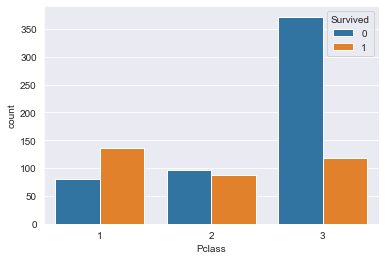

In [19]:
sns.countplot(x='Pclass',data=train,hue='Survived')

<AxesSubplot: xlabel='SibSp', ylabel='count'>

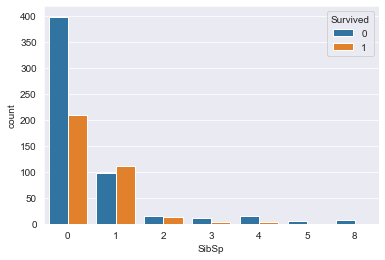

In [20]:
sns.countplot(x='SibSp',data=train,hue='Survived')

<AxesSubplot: xlabel='Embarked', ylabel='count'>

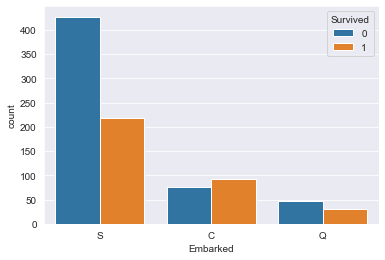

In [21]:
sns.countplot(x='Embarked',data=train,hue='Survived')

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [23]:
X=train.select_dtypes(include='number')
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

vif_data=vif_data.sort_values(by='VIF',ascending=False)

In [24]:
vif_data

,feature,VIF
2,Age,4.006601
1,Pclass,3.780124
5,Fare,1.832622
0,Survived,1.623010
3,SibSp,1.565323
4,Parch,1.557412


<AxesSubplot: >

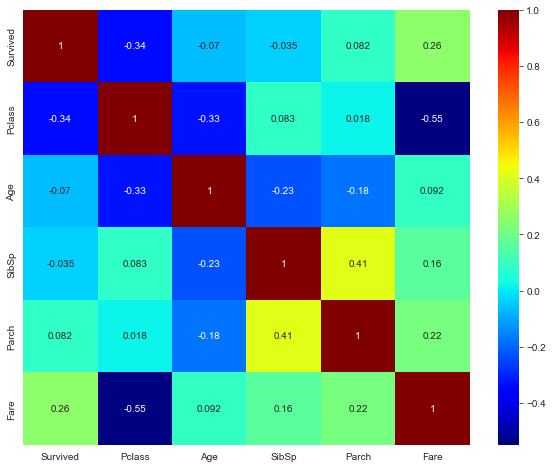

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(),annot=True,cmap='jet')

In [29]:
train


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,TC,TC1
0,0,3,male,22.000000,1,0,7.2500,S,A5,21171
1,1,1,female,38.000000,1,0,71.2833,C,PC,17599
2,1,3,female,26.000000,0,0,7.9250,S,SOTON,3101282
3,1,1,female,35.000000,1,0,53.1000,S,NA,113803
4,0,3,male,35.000000,0,0,8.0500,S,NA,373450
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,NA,211536
887,1,1,female,19.000000,0,0,30.0000,S,NA,112053
888,0,3,female,29.699118,1,2,23.4500,S,WC,6607
889,1,1,male,26.000000,0,0,30.0000,C,NA,111369


In [33]:
train=pd.get_dummies(train,columns=['Sex','Embarked'],drop_first=True)

In [34]:
from category_encoders import HashingEncoder

In [35]:
he=HashingEncoder(cols=['TC'])

In [36]:
he.fit(train)

HashingEncoder(cols=['TC'], max_process=4, max_sample=222)

In [38]:
train=he.transform(train)

# Model building

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

In [45]:
X=train.drop(['Survived','TC1'],axis=1)
y=train['Survived']

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=45)

In [47]:
model=RandomForestClassifier()

In [48]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [49]:
y_pred=model.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
accuracy_score(y_test,y_pred)

0.8507462686567164